In [7]:
#Cargabo librerías

%matplotlib inline

import pandas as pd
import random
import time
import re
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


In [8]:
#Configuración inicial

service = Service(r"C:\Users\Juan Carlos\Documents\Scrap_Inmuebles\chromedriver.exe")
driver = webdriver.Chrome(service=service)

# URL del listado de apartamentos
url_listado = "https://listado.mercadolibre.com.ve/inmuebles/apartamentos/venta/distrito-capital/caracas---libertador-centro/la-candelaria-o-parque-carabobo/"
# Extraer URLs de anuncios

driver.get(url_listado)
wait = WebDriverWait(driver, 20)
anuncios = wait.until(
    EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.poly-card__content h3 a"))
)

urls_anuncios = [a.get_attribute("href") for a in anuncios]

print(f"Se encontraron {len(urls_anuncios)} anuncios.")


Se encontraron 48 anuncios.


In [3]:
# Recorrer cada anuncio y extraer datos
resultados = []

for anuncio in urls_anuncios:
    driver.get(anuncio)
    time.sleep(random.randint(6, 10))  # pausa simulando lectura

    # Simular scroll
    body = driver.find_element(By.TAG_NAME, "body")
    for _ in range(random.randint(2, 4)):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(random.randint(2, 4))

    # Precio
    try:
        precio_text = driver.find_element(By.CSS_SELECTOR, "span.andes-money-amount__fraction").text
        precio = float(precio_text.replace(".", "").replace(",", "."))
    except Exception:
        precio = None

    # Metros cuadrados
    metros = None
    try:
        metros_elem = driver.find_elements(By.XPATH, "//span[contains(text(),'m²')]")
        if metros_elem:
            metros_text = metros_elem[0].text
            metros = float(metros_text.split()[0])
    except Exception:
        pass

 
    # Cuartos
    cuartos = None
    try:
        # Buscar elementos que contienen "cuartos", "habitaciones" o "hab."
        cuartos_elem = driver.find_elements(By.XPATH, "//div[contains(@class,'ui-pdp-highlighted-specs-res__icon-label')]//span[contains(text(),'cuartos') or contains(text(),'habitaciones') or contains(text(),'hab.')]")
        if cuartos_elem:
            # Extraer el texto del primer elemento encontrado
            cuartos_text = cuartos_elem[0].text
            # Extraer solo el número antes de "cuartos", "habitaciones" o "hab."
            cuartos = int(re.search(r'(\d+)', cuartos_text).group(0))
    except Exception as e:
         pass


    # Baños
    banos = None
    try:
        banos_elem = driver.find_elements(By.XPATH, "//div[contains(@class,'ui-pdp-highlighted-specs-res__icon-label')]//span[contains(text(),'baño')]")
        if banos_elem:
            banos_text = banos_elem[0].text
            banos = int(banos_text.split()[0])
    except Exception:
        pass

    print(f"Precio: {precio} | Metros: {metros} | Cuartos: {cuartos} | Baños: {banos} | URL: {anuncio}")

    resultados.append({
        "precio": precio,
        "metros": metros,
        "cuartos": cuartos,
        "banos": banos,
        "url": anuncio
    })

driver.quit()


Precio: 65000.0 | Metros: 160.0 | Cuartos: 4 | Baños: 3 | URL: https://apartamento.mercadolibre.com.ve/MLV-951155340-se-vende-apartamento-250-m2-4h3b-parque-carabobo-_JM#polycard_client=search-desktop&search_layout=grid&position=1&type=item&tracking_id=70848e4d-b285-4f41-be19-50c0dbbfcbd5
Precio: 54000.0 | Metros: 117.0 | Cuartos: 4 | Baños: 1 | URL: https://apartamento.mercadolibre.com.ve/MLV-960007834-te-lo-tengo-apartamento-en-venta-en-la-parroquia-la-candelaria-24-27082-_JM#polycard_client=search-desktop&search_layout=grid&position=2&type=item&tracking_id=70848e4d-b285-4f41-be19-50c0dbbfcbd5
Precio: 45000.0 | Metros: 81.0 | Cuartos: 3 | Baños: 1 | URL: https://apartamento.mercadolibre.com.ve/MLV-942315464-apto-en-venta-la-candelaria-24-17010-_JM#polycard_client=search-desktop&search_layout=grid&position=3&type=item&tracking_id=70848e4d-b285-4f41-be19-50c0dbbfcbd5
Precio: 65000.0 | Metros: 95.0 | Cuartos: 4 | Baños: 2 | URL: https://apartamento.mercadolibre.com.ve/MLV-956120614-apar

In [4]:
# DataFrame en memoria

df = pd.DataFrame(resultados)
print("\nResultados capturados:")
print(df)



Resultados capturados:
      precio  metros  cuartos  banos  \
0    65000.0   160.0        4      3   
1    54000.0   117.0        4      1   
2    45000.0    81.0        3      1   
3    65000.0    95.0        4      2   
4   130000.0   143.0        3      2   
5    53000.0    88.0        3      2   
6    63000.0   116.0        5      2   
7    55000.0    50.0        2      1   
8    55000.0    50.0        2      1   
9    95500.0    68.0        1      1   
10   65000.0    77.0        3      1   
11   55000.0    50.0        2      1   
12   49500.0    73.0        2      1   
13  100000.0   109.0        3      3   
14   50000.0    61.0        2      1   
15   54000.0    88.0        3      2   
16  115000.0   144.0        4      3   
17   52000.0    60.0        2      1   
18   65000.0    75.0        3      2   
19   62000.0    61.0        2      1   
20   54000.0    88.0        3      2   
21   62000.0    61.0        2      1   
22   75000.0   335.0        4      3   
23   55000.0    

In [5]:
# Agrupar por cuartos y calcular precio/m²

df["precio_m2"] = df.apply(lambda row: row["precio"]/row["metros"] if row["precio"] and row["metros"] else None, axis=1)

agrupado = df.groupby("cuartos")["precio_m2"].mean().reset_index()
print("\nPrecio promedio por metro cuadrado agrupado por cuartos:")
print(agrupado)



Precio promedio por metro cuadrado agrupado por cuartos:
   cuartos    precio_m2
0        1  1485.730787
1        2   945.192876
2        3   862.851868
3        4   499.652517
4        5   606.980364


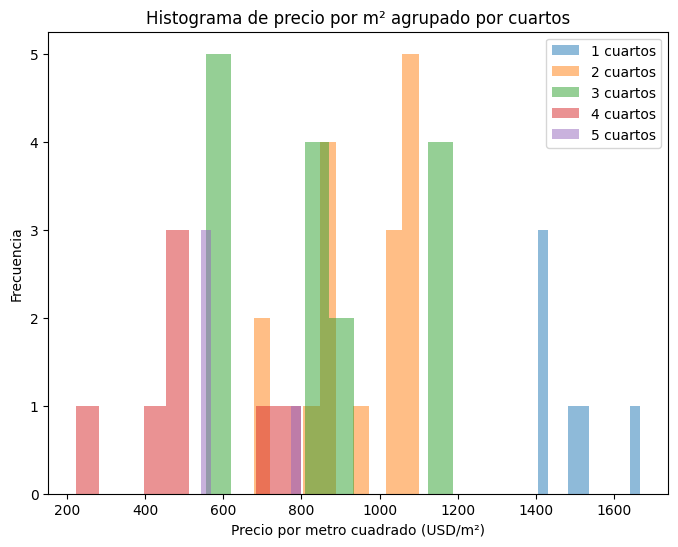

In [6]:
# Histograma

plt.figure(figsize=(8,6))
for cuartos in agrupado["cuartos"].dropna():
    subset = df[df["cuartos"] == cuartos]["precio_m2"].dropna()
    plt.hist(subset, bins=10, alpha=0.5, label=f"{cuartos} cuartos")

plt.xlabel("Precio por metro cuadrado (USD/m²)")
plt.ylabel("Frecuencia")
plt.title("Histograma de precio por m² agrupado por cuartos")
plt.legend()
plt.show()


